In [2]:
import pandas as pd
import seaborn as sns
import pandas_profiling                              # EDA 분석 패키지
from pandas_profiling import ProfileReport as pr
pd.set_option('display.max_columns',None)

# 데이터 로드

In [3]:
# pd.read_csv()
cus = pd.read_csv("'21년 해카톤_고객정보(유형별접촉횟수적용).csv")
car = pd.read_csv("'21년 해카톤_차량정보(구매유형분류,경과시간적용).csv")
cntc = pd.read_csv("'21년 해카톤_접촉정보.csv", encoding='cp949')

## 고객정보 데이터

In [3]:
# 데이터 살펴보기 - pd.DataFrame.shape, pd.DataFrame.head()
print(cus.info())
print('변수명 - 개인사업자여부, 성별, 생년월, 주소(행정시도명), 주소(시군구), 주택 평형, 주택 가격(단위:만원)')
cus.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096206 entries, 0 to 1096205
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   CUS_ID             1096206 non-null  object 
 1   PSN_BIZR_YN        1096206 non-null  object 
 2   SEX_SCN_NM         1096206 non-null  object 
 3   TYMD               1096206 non-null  int64  
 4   CUS_AGE            1096206 non-null  int64  
 5   CUS_ADM_TRY_NM     1017788 non-null  object 
 6   CUS_N_ADMZ_NM      948912 non-null   object 
 7   CUS_ADMB_NM        240900 non-null   object 
 8   CLB_HOUS_PYG_NM    1096206 non-null  int64  
 9   REAI_BZTC_AVG_PCE  1096206 non-null  float64
 10  PYG_AVG_PCE        1096206 non-null  float64
 11  WHOLE_CNTC         1096206 non-null  float64
 12  CNTC_SERV          1096206 non-null  float64
 13  CNTC_CST           1096206 non-null  float64
 14  CNTC_B/S           1096206 non-null  float64
 15  CNTC_EST           1096206 non-n

,CUS_ID,PSN_BIZR_YN,SEX_SCN_NM,TYMD,CUS_AGE,CUS_ADM_TRY_NM,CUS_N_ADMZ_NM,CUS_ADMB_NM,CLB_HOUS_PYG_NM,REAI_BZTC_AVG_PCE,PYG_AVG_PCE,WHOLE_CNTC,CNTC_SERV,CNTC_CST,CNTC_B/S,CNTC_EST,CNTC_C/C,CNTC_EVT,CNTC_INVIT,CNTC_F/S,CNTC_T/D,CNTC_TM
0,AONEEOO010000113,N,남자,19550301,66,서울특별시,구,NaN,32,107744.0,3367.0,12.0,7.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AONEEOO020000165,Y,남자,19511001,70,부산광역시,구,NaN,32,38688.0,1209.0,29.0,26.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AONEEOO020000170,N,남자,19520401,69,NaN,NaN,NaN,32,0.0,0.0,37.0,30.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AONEEOO020000290,Y,남자,19600701,61,인천광역시,구,NaN,32,35456.0,1108.0,13.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AONEEOO040000233,Y,남자,19530701,68,경기도,시,남면,32,48064.0,1502.0,25.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 차량정보 데이터

In [4]:
print(car.info())
print('변수명 - 차량ID, 고객ID, 출고일자, 보유시작일자, 보유종료일자, 차명, 차량등급명1, 차량등급명2, 엔진타입명, 트림명, 구매유형')
car.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331744 entries, 0 to 331743
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   CUS_ID            331744 non-null  object
 1   CAR_ID            331744 non-null  object
 2   WHOT_DT           331744 non-null  object
 3   CAR_HLDG_STRT_DT  331744 non-null  object
 4   CAR_HLDG_FNH_DT   331744 non-null  object
 5   CAR_NM            331744 non-null  object
 6   CAR_CGRD_NM_1     331744 non-null  object
 7   CAR_CGRD_NM_2     331744 non-null  object
 8   CAR_ENG_NM        331744 non-null  object
 9   CAR_TRIM_NM       331671 non-null  object
 10  PUR_NUM           331744 non-null  int64 
 11  ORD_CNT           331744 non-null  int64 
 12  LATEST_DT         331744 non-null  object
 13  LATEST_DT2        331744 non-null  object
 14  PUR_TYPE          331744 non-null  object
 15  ET                331744 non-null  object
dtypes: int64(2), object(14)
memory usage: 

,CUS_ID,CAR_ID,WHOT_DT,CAR_HLDG_STRT_DT,CAR_HLDG_FNH_DT,CAR_NM,CAR_CGRD_NM_1,CAR_CGRD_NM_2,CAR_ENG_NM,CAR_TRIM_NM,PUR_NUM,ORD_CNT,LATEST_DT,LATEST_DT2,PUR_TYPE,ET
0,AONEEOO010000113,H1308060741EBBA077034,2011-08-01,2011-08-01,1900-01-01,그랜저HG,승용,대형,가솔린 3.0,노블,2,2,2007-07-12,1900-01-01,대차,6개월이상
1,AONEEOO020000170,H1308192381UBDU081735,2012-11-20,2012-11-20,1900-01-01,싼타페 DM,RV,중형SUV,디젤 2.0,PREMIUM,2,2,2011-06-08,1900-01-01,대차,6개월이상
2,AONEEOO040000329,H1308042041BP7U177233,2007-03-15,2007-03-15,2011-11-26,아반떼,승용,준중형,가솔린 1.6,E16,2,1,2011-11-26,2004-01-16,대차,6개월이상
3,AONEEOO040000408,H1308060141BP9A344364,2008-04-08,2008-04-08,2009-09-26,그랜저,승용,대형,가솔린 Q270,디럭스,2,1,2009-09-26,2007-03-22,대차,6개월이상
4,AONEEOO050000406,H1308060141BP8A266545,2007-07-16,2007-07-16,2007-07-18,그랜저,승용,대형,가솔린 Q270,디럭스,3,1,2007-07-18,2004-02-04,대차,6개월이상


## 접촉정보 데이터

In [5]:
print(cntc.info())
print('변수명 - 접촉일련번호, 고객ID, 접촉일자, 접촉채널명, 접촉업무명')
cntc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734097 entries, 0 to 17734096
Data columns (total 5 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   CNTC_SN           int64 
 1   CUS_ID            object
 2   CNTC_DT           int64 
 3   CNTC_CHAN_NM      object
 4   CNTC_AFFR_SCN_NM  object
dtypes: int64(2), object(3)
memory usage: 676.5+ MB
None
변수명 - 접촉일련번호, 고객ID, 접촉일자, 접촉채널명, 접촉업무명


,CNTC_SN,CUS_ID,CNTC_DT,CNTC_CHAN_NM,CNTC_AFFR_SCN_NM
0,172591627,AOZZZZO010000035,20150504,방문(대면),정비
1,172610507,AOZZZZO010000035,20150504,방문(대면),정비
2,306638131,AOZZZZO010000035,20161202,방문(대면),정비
3,306641393,AOZZZZO010000035,20161202,방문(대면),정비
4,344010325,AOZZZZO010000035,20170215,방문(대면),정비


# 데이터 분석

In [4]:
# new_df에서 대차와 추가구매 데이터만 가져오기(최초구매 제외)
pur_type = car[(car['PUR_TYPE'] == '대차') | (car['PUR_TYPE'] == '추가구매')]    ### pur_type : 첫 구매를 제외한 대차/추가구매만 추출한 데이터
pur_type.head()

,CUS_ID,CAR_ID,WHOT_DT,CAR_HLDG_STRT_DT,CAR_HLDG_FNH_DT,CAR_NM,CAR_CGRD_NM_1,CAR_CGRD_NM_2,CAR_ENG_NM,CAR_TRIM_NM,PUR_NUM,ORD_CNT,LATEST_DT,LATEST_DT2,PUR_TYPE,ET
0,AONEEOO010000113,H1308060741EBBA077034,2011-08-01,2011-08-01,1900-01-01,그랜저HG,승용,대형,가솔린 3.0,노블,2,2,2007-07-12,1900-01-01,대차,6개월이상
1,AONEEOO020000170,H1308192381UBDU081735,2012-11-20,2012-11-20,1900-01-01,싼타페 DM,RV,중형SUV,디젤 2.0,PREMIUM,2,2,2011-06-08,1900-01-01,대차,6개월이상
2,AONEEOO040000329,H1308042041BP7U177233,2007-03-15,2007-03-15,2011-11-26,아반떼,승용,준중형,가솔린 1.6,E16,2,1,2011-11-26,2004-01-16,대차,6개월이상
3,AONEEOO040000408,H1308060141BP9A344364,2008-04-08,2008-04-08,2009-09-26,그랜저,승용,대형,가솔린 Q270,디럭스,2,1,2009-09-26,2007-03-22,대차,6개월이상
4,AONEEOO050000406,H1308060141BP8A266545,2007-07-16,2007-07-16,2007-07-18,그랜저,승용,대형,가솔린 Q270,디럭스,3,1,2007-07-18,2004-02-04,대차,6개월이상


In [5]:
# selected_df에 고객 정보 합치기 
cus_ptype = pd.merge(pur_type, cus, how='inner', on='CUS_ID')    ### cus_ptype : 구매 유형 분류 데이터에 고객 정보 데이터 병합(customer purchase type)
cus_ptype.head()

,CUS_ID,CAR_ID,WHOT_DT,CAR_HLDG_STRT_DT,CAR_HLDG_FNH_DT,CAR_NM,CAR_CGRD_NM_1,CAR_CGRD_NM_2,CAR_ENG_NM,CAR_TRIM_NM,PUR_NUM,ORD_CNT,LATEST_DT,LATEST_DT2,PUR_TYPE,ET,PSN_BIZR_YN,SEX_SCN_NM,TYMD,CUS_AGE,CUS_ADM_TRY_NM,CUS_N_ADMZ_NM,CUS_ADMB_NM,CLB_HOUS_PYG_NM,REAI_BZTC_AVG_PCE,PYG_AVG_PCE,WHOLE_CNTC,CNTC_SERV,CNTC_CST,CNTC_B/S,CNTC_EST,CNTC_C/C,CNTC_EVT,CNTC_INVIT,CNTC_F/S,CNTC_T/D,CNTC_TM
0,AONEEOO010000113,H1308060741EBBA077034,2011-08-01,2011-08-01,1900-01-01,그랜저HG,승용,대형,가솔린 3.0,노블,2,2,2007-07-12,1900-01-01,대차,6개월이상,N,남자,19550301,66,서울특별시,구,NaN,32,107744.0,3367.0,12.0,7.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AONEEOO020000170,H1308192381UBDU081735,2012-11-20,2012-11-20,1900-01-01,싼타페 DM,RV,중형SUV,디젤 2.0,PREMIUM,2,2,2011-06-08,1900-01-01,대차,6개월이상,N,남자,19520401,69,NaN,NaN,NaN,32,0.0,0.0,37.0,30.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AONEEOO040000329,H1308042041BP7U177233,2007-03-15,2007-03-15,2011-11-26,아반떼,승용,준중형,가솔린 1.6,E16,2,1,2011-11-26,2004-01-16,대차,6개월이상,N,남자,19580401,63,경상북도,군,성산면,32,18016.0,563.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AONEEOO040000408,H1308060141BP9A344364,2008-04-08,2008-04-08,2009-09-26,그랜저,승용,대형,가솔린 Q270,디럭스,2,1,2009-09-26,2007-03-22,대차,6개월이상,Y,남자,19631001,58,전라남도,군,해제면,32,20192.0,631.0,17.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AONEEOO050000406,H1308060141BP8A266545,2007-07-16,2007-07-16,2007-07-18,그랜저,승용,대형,가솔린 Q270,디럭스,3,1,2007-07-18,2004-02-04,대차,6개월이상,Y,남자,19641201,57,서울특별시,구,NaN,34,130000.0,3367.0,21.0,15.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 대차/추가구매 비율 및 수치

In [6]:
from numpy.polynomial.polynomial import polyfit
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트
font = fm.FontProperties(fname=r'Malgun.ttf', size=10).get_name()
rc('font', family=font)

In [7]:
cus_pur = cus_ptype

C:\Users\hwane\anaconda3\envs\py3.6.10\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


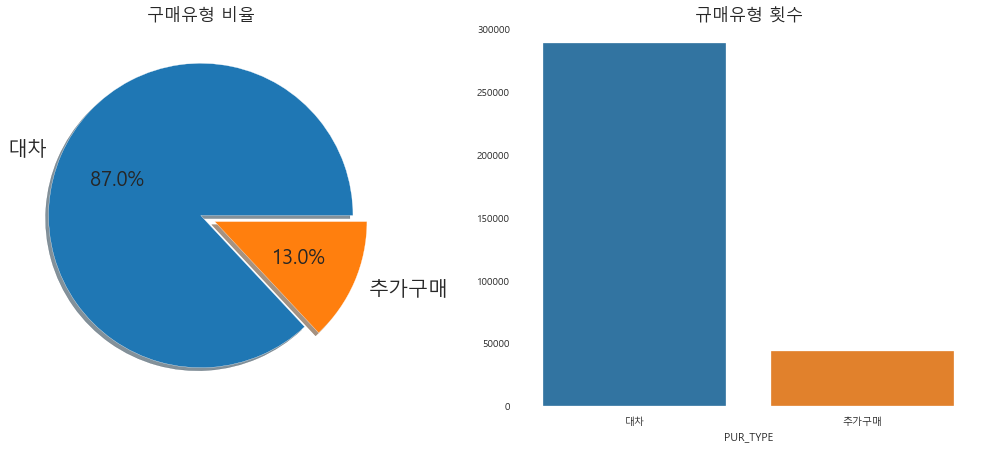

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(18,7))
cus_pur['PUR_TYPE'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, textprops={'fontsize': 20})
ax[0].set_title('구매유형 비율', fontsize=17)
ax[0].set_ylabel('')
sns.countplot('PUR_TYPE',data=cus_pur,ax=ax[1])
ax[1].set_title('규매유형 횟수', fontsize=17)
ax[1].set_ylabel('')
plt.show()

### 연도별 대차/추가구매 수치

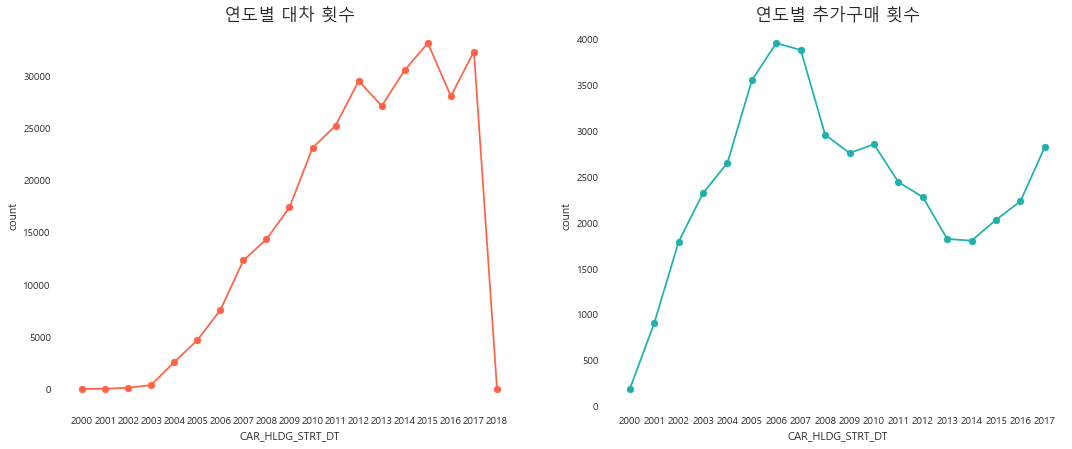

In [19]:
cus_pur['CAR_HLDG_STRT_DT'] = pd.to_datetime(cus_pur['CAR_HLDG_STRT_DT'])
cus_pur['CAR_HLDG_STRT_DT'] = cus_pur['CAR_HLDG_STRT_DT'].dt.year
cus_pur['CAR_HLDG_STRT_DT'] = cus_pur['CAR_HLDG_STRT_DT'].astype('str')
new_pur = cus_pur[(cus_pur['PUR_TYPE'] == '대차')].groupby('CAR_HLDG_STRT_DT')['CUS_ID'].count()       ### new_pur : 연도별 대차 건수
add_pur = cus_pur[(cus_pur['PUR_TYPE'] == '추가구매')].groupby('CAR_HLDG_STRT_DT')['CUS_ID'].count()    ### add_pur : 연도별 추가구매 건수
new_pur = new_pur.reset_index()
add_pur = add_pur.reset_index()

# 그래프를 1행 2열로 배치
fig, ax = plt.subplots(1, 2, figsize=(18,7))

# 각 액자들에 그래프를 그린다.
ax[0].plot(new_pur['CAR_HLDG_STRT_DT'], new_pur['CUS_ID'], color='tomato')
ax[0].scatter(new_pur['CAR_HLDG_STRT_DT'], new_pur['CUS_ID'], color='tomato')
ax[0].set_title('연도별 대차 횟수', fontsize=17)
ax[0].set_xlabel('CAR_HLDG_STRT_DT')
ax[0].set_ylabel('count')

ax[1].plot(add_pur['CAR_HLDG_STRT_DT'], add_pur['CUS_ID'], color='lightseagreen')
ax[1].scatter(add_pur['CAR_HLDG_STRT_DT'], add_pur['CUS_ID'], color='lightseagreen')
ax[1].set_title('연도별 추가구매 횟수', fontsize=17)
ax[1].set_xlabel('CAR_HLDG_STRT_DT')
ax[1].set_ylabel('count')

plt.show()

### 고객 연령별 대차/추가구매 수치

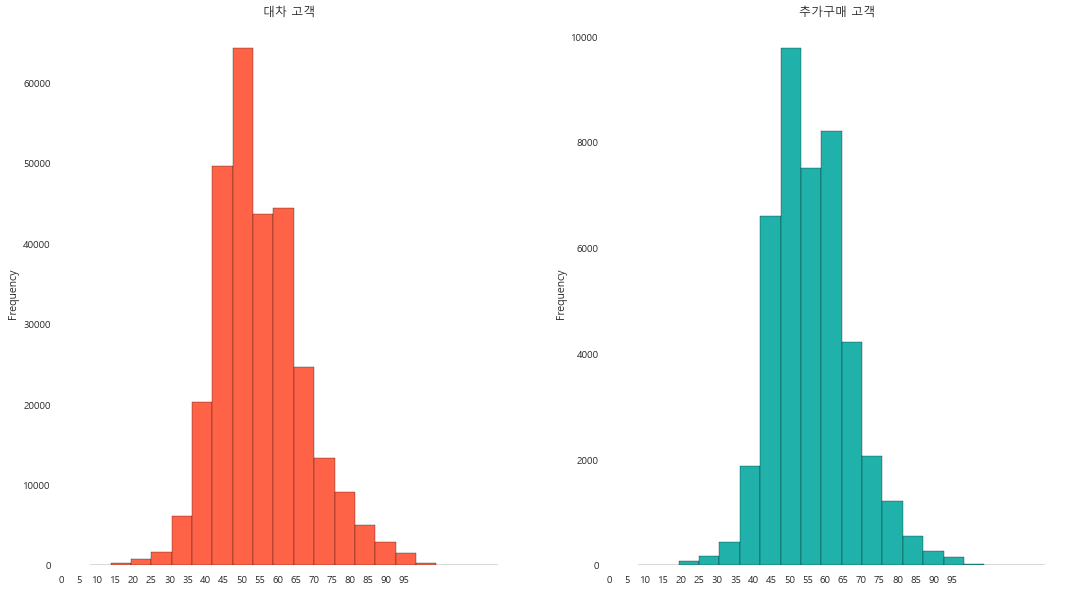

In [30]:

fig, ax = plt.subplots(1, 2, figsize=(18,10))
cus_pur[cus_pur['PUR_TYPE']=='대차'].CUS_AGE.plot.hist(ax=ax[0],bins=20,color='tomato',edgecolor='black')
ax[0].set_title('대차 고객')
x1=list(range(0,100,5))
ax[0].set_xticks(x1)
cus_pur[cus_pur['PUR_TYPE']=='추가구매'].CUS_AGE.plot.hist(ax=ax[1],bins=20,color='lightseagreen',edgecolor='black')
ax[1].set_title('추가구매 고객')
x2=list(range(0,100,5))
ax[1].set_xticks(x2)
plt.show()

### 대차/추가구매 성비

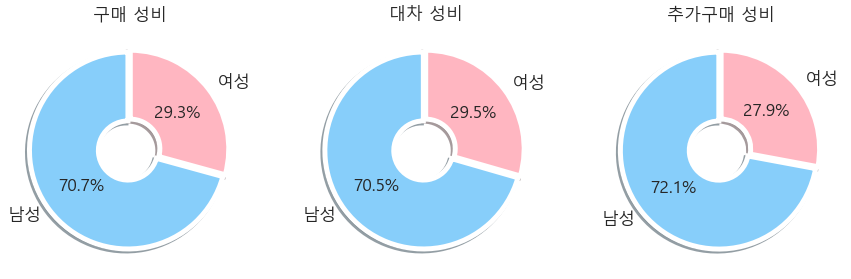

In [26]:
# 비율 확인 value_counts(normalize=True)
t_sex_pc = cus_ptype['SEX_SCN_NM'].value_counts(normalize=True)                                        ### t_sex_pc : 전체 구매 성별 비율(total sex percent)
t_sex_pc = t_sex_pc.reset_index().sort_values(by='SEX_SCN_NM', ascending=False)
np_sex_pc = cus_ptype['SEX_SCN_NM'][(cus_ptype['PUR_TYPE']=='대차')].value_counts(normalize=True)       ### np_sex_pc : 대차 성별 비율(new purchase sex percent)
np_sex_pc = np_sex_pc.reset_index().sort_values(by='SEX_SCN_NM', ascending=False)
ap_sex_pc = cus_ptype['SEX_SCN_NM'][(cus_ptype['PUR_TYPE']=='추가구매')].value_counts(normalize=True)    ### ap_sex_pc : 추가구매 성별 비율(add purchase sex percent)
ap_sex_pc = ap_sex_pc.reset_index().sort_values(by='SEX_SCN_NM', ascending=False)

labels = ['남성', '여성']
explode = [0.03, 0]                                           ### explode : 부채꼴이 파이 차트의 중심에서 벗어나는 정도
colors = ['lightskyblue', 'lightpink']                           ### colors : 색상
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}    ### wedgeprops : 부채꼴 영역 스타일

# 1행 3열로 액자들을 그린다.
fig, ax = plt.subplots(1, 3, figsize=(15,10))

ax[0].pie(t_sex_pc['SEX_SCN_NM'], labels=labels, autopct='%.1f%%', explode=explode, colors=colors, wedgeprops=wedgeprops, shadow=True, startangle=90, textprops={'fontsize': 17})
ax[0].set_title('구매 성비', fontsize=17)
ax[1].pie(np_sex_pc['SEX_SCN_NM'], labels=labels, autopct='%.1f%%', explode=explode, colors=colors, wedgeprops=wedgeprops, shadow=True, startangle=90, textprops={'fontsize': 17})
ax[1].set_title('대차 성비', fontsize=17)
ax[2].pie(ap_sex_pc['SEX_SCN_NM'], labels=labels, autopct='%.1f%%', explode=explode, colors=colors, wedgeprops=wedgeprops, shadow=True, startangle=90, textprops={'fontsize': 17})
ax[2].set_title('추가구매 성비', fontsize=17)
plt.show()

### 차종별 대차/추가구매 수치

In [13]:
pd.crosstab(cus_pur.CAR_CGRD_NM_2,cus_pur.PUR_TYPE,margins=True).style.background_gradient(cmap='summer_r')

PUR_TYPE,대차,추가구매,All
CAR_CGRD_NM_2,,,
RV_미식별,1035,1616,2651
대형,76862,9185,86047
대형SUV,4866,666,5532
소형,8914,3005,11919
스포츠,1504,594,2098
승용_미식별,46,133,179
준중형,50934,9983,60917
준중형SUV,28003,3799,31802
중형,62456,8036,70492


C:\Users\hwane\anaconda3\envs\py3.6.10\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hwane\anaconda3\envs\py3.6.10\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


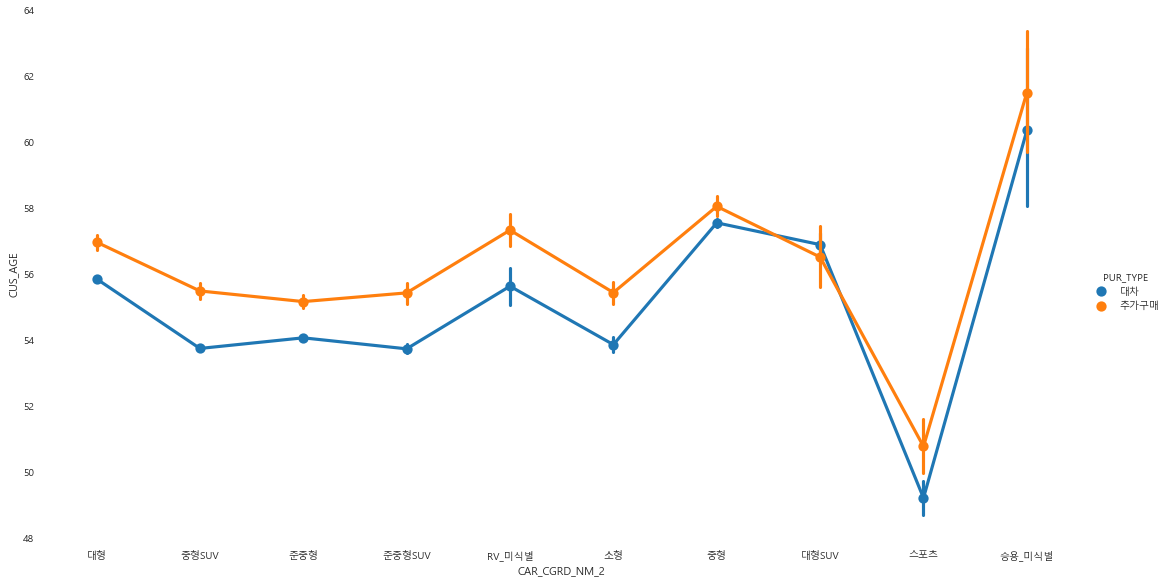

In [14]:
sns.factorplot('CAR_CGRD_NM_2','CUS_AGE',hue='PUR_TYPE',data=cus_pur,height=8, aspect=15/8)
plt.show()

### 지역별 대차/추가구매 비율

In [16]:
t_state = cus_ptype['CUS_ADM_TRY_NM'].value_counts(normalize=True)                                         ### t_state : 광역자치단체별 구매 비율
t_state = t_state.reset_index()
t_state = t_state.rename(columns={'index': 'CUS_ADM_TRY_NM', 'CUS_ADM_TRY_NM': 'PERCENT'})

np_state = cus_ptype['CUS_ADM_TRY_NM'][(cus_ptype['PUR_TYPE']=='대차')].value_counts(normalize=True)        ### np_state : 광역자치단체별 대차 비율
np_state = np_state.reset_index()
np_state = np_state.rename(columns={'index': 'CUS_ADM_TRY_NM', 'CUS_ADM_TRY_NM': 'PERCENT'})

ap_state = cus_ptype['CUS_ADM_TRY_NM'][(cus_ptype['PUR_TYPE']=='추가구매')].value_counts(normalize=True)     ### ap_state : 광역자치단체별 추가구매 비율
ap_state = ap_state.reset_index()
ap_state = ap_state.rename(columns={'index': 'CUS_ADM_TRY_NM', 'CUS_ADM_TRY_NM': 'PERCENT'})

state = pd.merge(t_state, np_state, on='CUS_ADM_TRY_NM')                                                    ### state : 광역자치단체별 각 구매 비율 종합
state = pd.merge(state, ap_state, on='CUS_ADM_TRY_NM')
state = state.rename(columns={'PERCENT_x':'TOTAL_PER','PERCENT_y':'NEW_PER','PERCENT':'ADD_PER'})
state = state.set_index('CUS_ADM_TRY_NM').sort_values(by='TOTAL_PER', ascending=False)

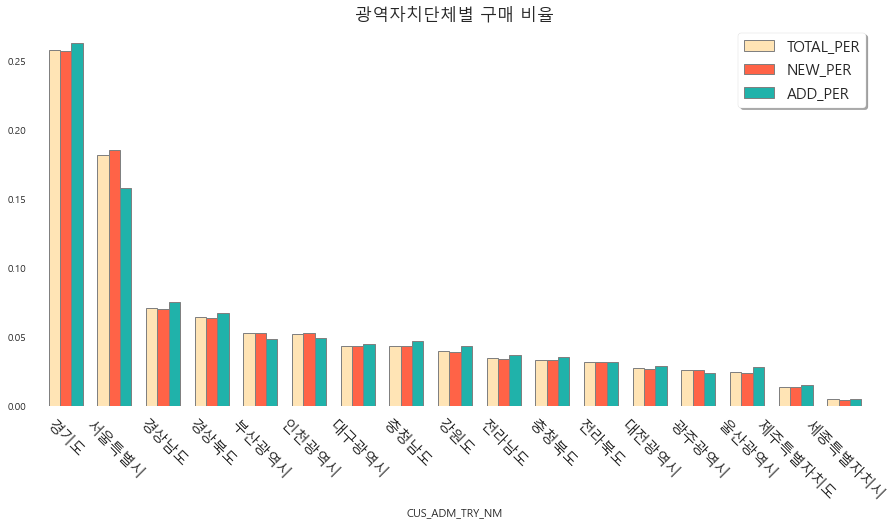

In [17]:
colors_bar = ['moccasin', 'tomato', 'lightseagreen']
state.plot.bar(figsize=(15,7), rot=315, width=0.7, color=colors_bar, edgecolor='grey', linewidth=1)
plt.title('광역자치단체별 구매 비율', fontsize=17)
plt.legend(loc='upper right', shadow=True, fontsize=15)
plt.xticks(fontsize=15)
plt.show()

C:\Users\hwane\anaconda3\envs\py3.6.10\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hwane\anaconda3\envs\py3.6.10\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


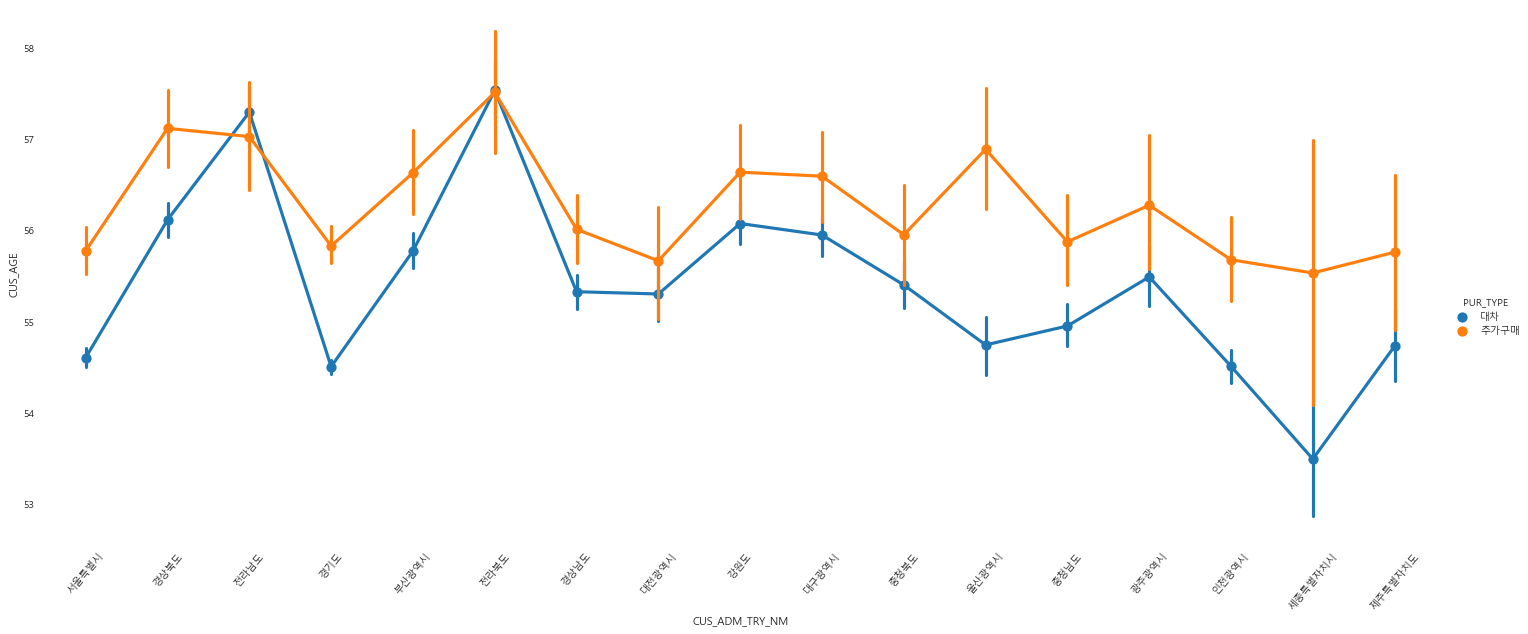

In [18]:
sns.factorplot('CUS_ADM_TRY_NM','CUS_AGE',hue='PUR_TYPE',data=cus_pur,height=8, aspect=20/8)
plt.xticks(rotation = 50)
plt.show()

### 대차/추가구매 시군구 비율

In [19]:
# 시,군,구로 변환해서 도시, 시골 비율 확인
print(cus_ptype.CUS_N_ADMZ_NM.unique())
cus_ptype['CUS_N_ADMZ_NM'] = cus_ptype['CUS_N_ADMZ_NM'].replace(['고양시 일산서','고양시 일산동','창원시 마산회','창원시 마산합'],
                                                              ['고양시','고양시','창원시','창원시'])
cus_ptype['CUS_N_ADMZ_NM'] = cus_ptype['CUS_N_ADMZ_NM'].str[-1]
cus_ptype['CUS_N_ADMZ_NM'] = cus_ptype['CUS_N_ADMZ_NM'].fillna('NA')
cus_ptype['CUS_N_ADMZ_NM'].head()

['구' nan '군' '시']


0     구
1    NA
2     군
3     군
4     구
Name: CUS_N_ADMZ_NM, dtype: object

In [20]:
city_type = cus_ptype.drop(cus_ptype[cus_ptype['CUS_N_ADMZ_NM'] == 'NA'].index)    ### city_type : 전체데이터인 cus_ptype에서 도시 결측치를 제거한 데이터프레임
city_type = city_type.reset_index(drop=True)
city_type

,CUS_ID,CAR_ID,WHOT_DT,CAR_HLDG_STRT_DT,CAR_HLDG_FNH_DT,CAR_NM,CAR_CGRD_NM_1,CAR_CGRD_NM_2,CAR_ENG_NM,CAR_TRIM_NM,PUR_NUM,ORD_CNT,LATEST_DT,LATEST_DT2,PUR_TYPE,ET,PSN_BIZR_YN,SEX_SCN_NM,TYMD,CUS_AGE,CUS_ADM_TRY_NM,CUS_N_ADMZ_NM,CUS_ADMB_NM,CLB_HOUS_PYG_NM,REAI_BZTC_AVG_PCE,PYG_AVG_PCE,WHOLE_CNTC,CNTC_SERV,CNTC_CST,CNTC_B/S,CNTC_EST,CNTC_C/C,CNTC_EVT,CNTC_INVIT,CNTC_F/S,CNTC_T/D,CNTC_TM
0,AONEEOO010000113,H1308060741EBBA077034,2011-08-01,2011,1900-01-01,그랜저HG,승용,대형,가솔린 3.0,노블,2,2,2007-07-12,1900-01-01,대차,6개월이상,N,남자,19550301,66,서울특별시,구,NaN,32,107744.0,3367.0,12.0,7.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AONEEOO040000329,H1308042041BP7U177233,2007-03-15,2007,2011-11-26,아반떼,승용,준중형,가솔린 1.6,E16,2,1,2011-11-26,2004-01-16,대차,6개월이상,N,남자,19580401,63,경상북도,군,성산면,32,18016.0,563.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AONEEOO040000408,H1308060141BP9A344364,2008-04-08,2008,2009-09-26,그랜저,승용,대형,가솔린 Q270,디럭스,2,1,2009-09-26,2007-03-22,대차,6개월이상,Y,남자,19631001,58,전라남도,군,해제면,32,20192.0,631.0,17.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AONEEOO050000406,H1308060141BP8A266545,2007-07-16,2007,2007-07-18,그랜저,승용,대형,가솔린 Q270,디럭스,3,1,2007-07-18,2004-02-04,대차,6개월이상,Y,남자,19641201,57,서울특별시,구,NaN,34,130000.0,3367.0,21.0,15.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AONEEOO070000324,H1308060741EBCA182727,2012-08-17,2012,2017-08-24,그랜저HG,승용,대형,가솔린 3.0,노블,3,1,2017-08-24,2012-08-21,대차,6개월미만,N,남자,19610601,60,서울특별시,구,NaN,21,70707.0,3367.0,10.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288668,ATZZZZV310001170,H1308032051UBDU104344,2013-02-21,2013,2014-07-24,엑센트,승용,소형,디젤 1.6,Premier,2,1,2014-07-24,2006-12-27,대차,6개월이상,N,남자,19751201,46,경기도,구,NaN,32,48064.0,1502.0,9.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
288669,ATZZZZV310001172,H1308042141TP7U199924,2007-04-09,2007,2010-01-29,아반떼,승용,준중형,해당없음,해당없음,2,1,2010-01-29,2006-07-26,대차,6개월이상,N,남자,19760101,45,대전광역시,구,NaN,31,53600.0,1253.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
288670,ATZZZZV310001199,H1308062141CP3A296722,2003-06-23,2003,2010-02-05,그랜저,승용,대형,2007이전 데이터,2007이전 데이터,2,1,2010-02-05,2002-04-19,대차,6개월이상,N,남자,19770901,44,서울특별시,구,NaN,32,107744.0,3367.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
288671,ATZZZZV310001232,H1308040741LBCU575856,2012-06-15,2012,2014-12-06,아반떼MD,승용,준중형,LPI 1.6,A,2,1,2014-12-06,2008-04-12,대차,6개월이상,N,남자,19850501,36,경기도,시,고덕면,24,10100.0,1502.0,13.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# 연령대 비율 확인
t_district = city_type['CUS_N_ADMZ_NM'].value_counts(normalize=True)                                         ### t_district : 시군구별 구매 비율
t_district = t_district.reset_index()
t_district = t_district.rename(columns={'index': 'CUS_N_ADMZ_NM', 'CUS_N_ADMZ_NM': 'PERCENT'})

np_district = city_type['CUS_N_ADMZ_NM'][(city_type['PUR_TYPE']=='대차')].value_counts(normalize=True)        ### np_district : 시군구별 대차 비율
np_district = np_district.reset_index()
np_district = np_district.rename(columns={'index': 'CUS_N_ADMZ_NM', 'CUS_N_ADMZ_NM': 'PERCENT'})

ap_district = city_type['CUS_N_ADMZ_NM'][(city_type['PUR_TYPE']=='추가구매')].value_counts(normalize=True)     ### ap_district : 시군구별 추가구매 비율
ap_district = ap_district.reset_index()
ap_district = ap_district.rename(columns={'index': 'CUS_N_ADMZ_NM', 'CUS_N_ADMZ_NM': 'PERCENT'})

  CUS_N_ADMZ_NM   PERCENT
0             구  0.529215
1             시  0.376786
2             군  0.093999
  CUS_N_ADMZ_NM   PERCENT
0             구  0.533871
1             시  0.373323
2             군  0.092806
  CUS_N_ADMZ_NM   PERCENT
0             구  0.498555
1             시  0.399590
2             군  0.101855


C:\Users\hwane\anaconda3\envs\py3.6.10\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  app.launch_new_instance()


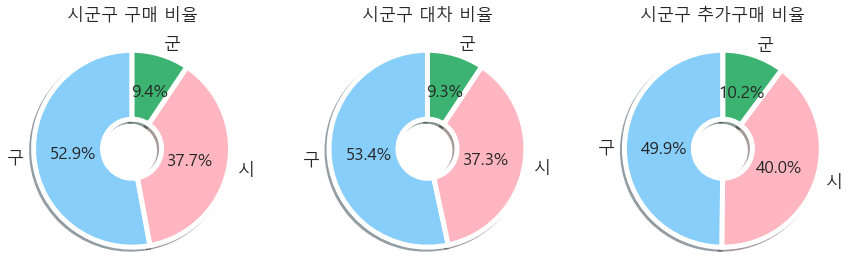

In [22]:
print(t_district)
print(np_district)
print(ap_district)

# 그래프
labels = t_district['CUS_N_ADMZ_NM']
explode = [0,0,0]
colors = ['lightskyblue', 'lightpink', 'mediumseagreen']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

# 1행 3열로 액자들을 그린다.
fig, ax = plt.subplots(1, 3, figsize=(15, 10))

ax[0].pie(t_district['PERCENT'], labels=labels, autopct='%.1f%%', explode=explode, colors=colors, wedgeprops=wedgeprops, shadow=True, startangle=90, textprops={'fontsize': 17})
ax[0].set_title('시군구 구매 비율', fontsize=17)
ax[1].pie(np_district['PERCENT'], labels=labels, autopct='%.1f%%', explode=explode, colors=colors, wedgeprops=wedgeprops, shadow=True, startangle=90, textprops={'fontsize': 17})
ax[1].set_title('시군구 대차 비율', fontsize=17)
ax[2].pie(ap_district['PERCENT'], labels=labels, autopct='%.1f%%', explode=explode, colors=colors, wedgeprops=wedgeprops, shadow=True, startangle=90, textprops={'fontsize': 17})
ax[2].set_title('시군구 추가구매 비율', fontsize=17)
plt.show()

### 고객 접촉 유형별 대차/추가구매 비율

In [23]:
contect = cntc    ### contect : 고객접촉정보(cntc) 데이터 프레임 복사
contect = contect[['CUS_ID','CNTC_AFFR_SCN_NM']]
contect = contect.rename(columns={'CNTC_AFFR_SCN_NM':'CNTC_TYPE'})
print(contect.head())
# 고객 접촉 종류 확인
print(contect['CNTC_TYPE'].unique())

             CUS_ID CNTC_TYPE
0  AOZZZZO010000035        정비
1  AOZZZZO010000035        정비
2  AOZZZZO010000035        정비
3  AOZZZZO010000035        정비
4  AOZZZZO010000035        정비
['정비' '일반상담' '비포서비스' '견적' '불만상담' '이벤트' '고객초청행사' '비포서비스&무상점검' '시승센터시승'
 '영업활동(TM)' '영업활동(대면)']


In [24]:
cus_pt = cus_ptype[['CUS_ID','PUR_TYPE']]
cus_pt.head()

,CUS_ID,PUR_TYPE
0,AONEEOO010000113,대차
1,AONEEOO020000170,대차
2,AONEEOO040000329,대차
3,AONEEOO040000408,대차
4,AONEEOO050000406,대차


In [25]:
cus_info = pd.merge(cus_pt, contect, on='CUS_ID')    ### ptype_ccnt : 구매정보 + 개인정보 + 접촉횟수
cus_info.head()

,CUS_ID,PUR_TYPE,CNTC_TYPE
0,AONEEOO010000113,대차,정비
1,AONEEOO010000113,대차,정비
2,AONEEOO010000113,대차,정비
3,AONEEOO010000113,대차,정비
4,AONEEOO010000113,대차,정비


In [26]:
# 접촉 유형 비율 확인
t_cnt = cus_info['CNTC_TYPE'].value_counts(normalize=True)                                         ### t_district : 시군구별 구매 비율
t_cnt = t_cnt.reset_index()
t_cnt = t_cnt.rename(columns={'index':'CNTC_TYPE', 'CNTC_TYPE':'PERCENT'})

np_cnt = cus_info['CNTC_TYPE'][(cus_info['PUR_TYPE']=='대차')].value_counts(normalize=True)        ### np_district : 시군구별 대차 비율
np_cnt = np_cnt.reset_index()
np_cnt = np_cnt.rename(columns={'index':'CNTC_TYPE', 'CNTC_TYPE':'PERCENT'})

ap_cnt = cus_info['CNTC_TYPE'][(cus_info['PUR_TYPE']=='추가구매')].value_counts(normalize=True)     ### ap_district : 시군구별 추가구매 비율
ap_cnt = ap_cnt.reset_index()
ap_cnt = ap_cnt.rename(columns={'index':'CNTC_TYPE', 'CNTC_TYPE':'PERCENT'})

In [27]:
cnt = pd.merge(t_cnt, np_cnt, on='CNTC_TYPE')                                                    ### state : 광역자치단체별 각 구매 비율 종합
cnt = pd.merge(cnt, ap_cnt, on='CNTC_TYPE')
cnt = cnt.rename(columns={'PERCENT_x':'TOTAL_PER','PERCENT_y':'NEW_PER','PERCENT':'ADD_PER'})
cnt = cnt.set_index('CNTC_TYPE').sort_values(by='TOTAL_PER', ascending=False)
cnt

,TOTAL_PER,NEW_PER,ADD_PER
CNTC_TYPE,,,
정비,0.752226,0.753123,0.748114
일반상담,0.144203,0.144318,0.143675
견적,0.082819,0.081790,0.087535
불만상담,0.006883,0.006715,0.007653
이벤트,0.005970,0.006064,0.005540
시승센터시승,0.004795,0.004966,0.004007
비포서비스,0.001810,0.001831,0.001714
비포서비스&무상점검,0.000894,0.000890,0.000913
고객초청행사,0.000392,0.000293,0.000847


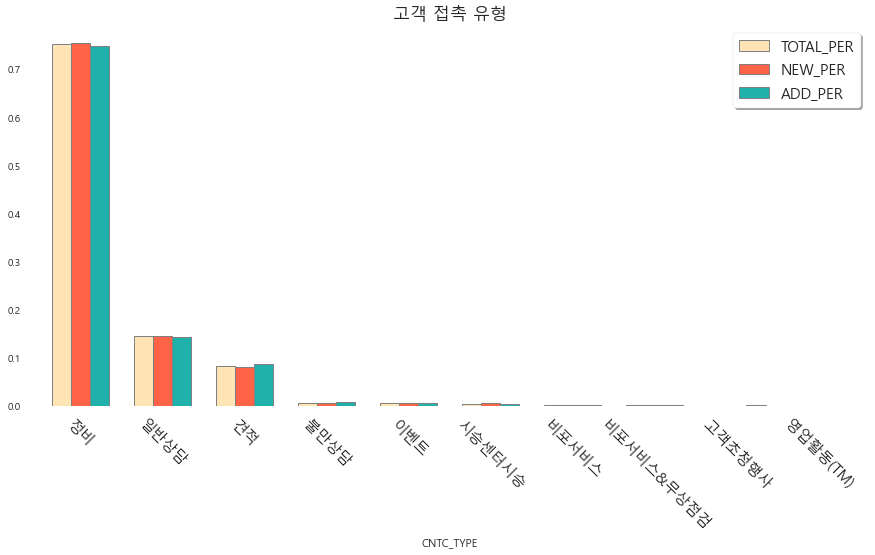

In [28]:
cnt.plot.bar(figsize=(15,7), rot=315, width=0.7, color=colors_bar, edgecolor='grey', linewidth=1)
plt.title('고객 접촉 유형', fontsize=17)
plt.legend(loc='upper right', shadow=True, fontsize=15)
plt.xticks(fontsize=15)
plt.show()